4 columnas numéricas

* price
* bedrooms
* bathrooms
* m2
* address (quitarle lo de ", Madrid" con numpy)

En cada apartado hacer visualizaciones con matplotlib o seaborn.

* 25 %:

* Carga de datos: cargarlo con np.genfromtext
* Media, mediana
* Máximo y mínimo
* histograma y curva de densidad

* 25 %

* Cuartiles: Q1 (25), Q2 (50), Q3 (75)
* IQR
* Filtrar 20 % más caro, y el 20 % más barato
* Opcional: filtrar los barrios 20 % más baratos
* Moda: calcular moda también de address
* Opcional: Moda de los barrios más baratos y más caros
* Dispersión: varianza y desviación estándar

25 % 

* Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.
* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

25 % 

* Asimetría y curtosis
* Transformar distribuciones e interpretar resultados
* Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random
import seaborn as sns

### Carga de datos:
* price
* bedrooms
* bathrooms
* m2
* address

In [29]:
price = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bedrooms = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
bathrooms = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
m2 = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
address = np.genfromtxt("idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, encoding="utf-8", dtype=str)


### Media, mediana, máximo y mínimo

In [40]:
# Medias
mean_price = np.mean(price)
mean_bedr = np.mean(bedrooms)
mean_bath = np.mean(bathrooms)
mean_m2 = np.mean(m2)


# Medianas
medi_price = np.median(price)
medi_bedr = np.median(bedrooms)
medi_bath = np.median(bathrooms)
medi_m2 = np.median(m2)


# Maximos
max_price = np.max(price)
max_bedr = np.max(bedrooms)
max_bath = np.max(bathrooms)
max_m2 = np.max(m2)


# Minimos
min_price = np.min(price)
min_bedr = np.min(bedrooms)
min_bath = np.min(bathrooms)
min_m2 = np.min(m2)



### Histograma

<function matplotlib.pyplot.show(close=None, block=None)>

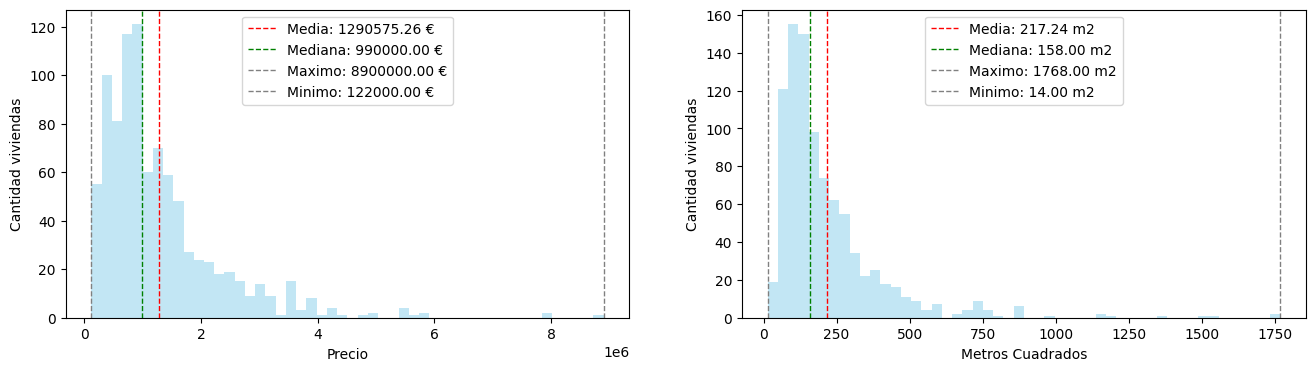

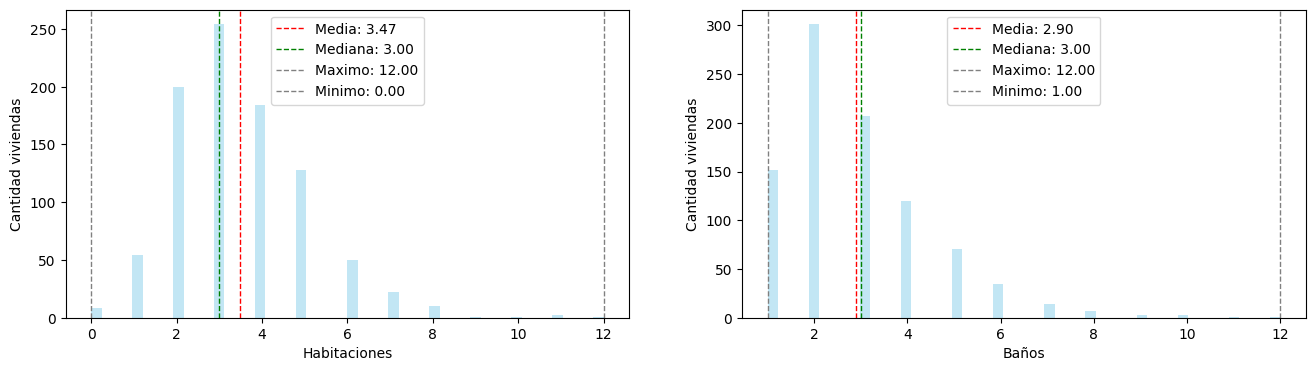

In [56]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.hist(price, bins=50, color='skyblue', alpha=0.5)
plt.xlabel("Precio")
plt.ylabel("Cantidad viviendas")
plt.axvline(mean_price, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean_price:.2f} €"))
plt.axvline(medi_price, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi_price:.2f} €"))
plt.axvline(max_price, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {max_price:.2f} €"))
plt.axvline(min_price, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {min_price:.2f} €"))
plt.legend()
plt.show

plt.subplot(1, 2, 2)
plt.hist(m2, bins=50, color='skyblue', alpha=0.5)
plt.xlabel("Metros Cuadrados")
plt.ylabel("Cantidad viviendas")
plt.axvline(mean_m2, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean_m2:.2f} m2"))
plt.axvline(medi_m2, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi_m2:.2f} m2"))
plt.axvline(max_m2, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {max_m2:.2f} m2"))
plt.axvline(min_m2, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {min_m2:.2f} m2"))
plt.legend()
plt.show

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.hist(bedrooms, bins=50, color='skyblue', alpha=0.5)
plt.xlabel("Habitaciones")
plt.ylabel("Cantidad viviendas")
plt.axvline(mean_bedr, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean_bedr:.2f}"))
plt.axvline(medi_bedr, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi_bedr:.2f}"))
plt.axvline(max_bedr, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {max_bedr:.2f}"))
plt.axvline(min_bedr, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {min_bedr:.2f}"))
plt.legend()
plt.show

plt.subplot(1, 2, 2)
plt.hist(bathrooms, bins=50, color='skyblue', alpha=0.5)
plt.xlabel("Baños")
plt.ylabel("Cantidad viviendas")
plt.axvline(mean_bath, color='red', linestyle= 'dashed', linewidth=1, label=(f"Media: {mean_bath:.2f}"))
plt.axvline(medi_bath, color='green', linestyle= 'dashed', linewidth=1, label=(f"Mediana: {medi_bath:.2f}"))
plt.axvline(max_bath, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Maximo: {max_bath:.2f}"))
plt.axvline(min_bath, color='grey', linestyle= 'dashed', linewidth=1, label=(f"Minimo: {min_bath:.2f}"))
plt.legend()
plt.show

### Curva de densidad